# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('dados_encoded.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [3]:
metadados = pd.DataFrame(df.nunique()).reset_index()
metadados.columns=['variaveis','qtd_categorias']
tp = []
tp = list(df.dtypes)
metadados['tipo_dados'] = tp
metadados

,variaveis,qtd_categorias,tipo_dados
0,sexo,2,int64
1,posse_de_veiculo,2,int64
2,posse_de_imovel,2,int64
3,qtd_filhos,8,int64
4,idade,5298,float64
5,tempo_emprego,3005,float64
6,possui_celular,1,int64
7,possui_fone_comercial,2,int64
8,possui_fone,2,int64
9,possui_email,2,int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  int64  
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_celular                          16650 non-null  int64  
 7   possui_fone_comercial                   16650 non-null  int64  
 8   possui_fone                             16650 non-null  int64  
 9   possui_email                            16650 non-null  int64  
 10  qt_pessoas_residencia                   16650 non-null  fl

In [5]:
df.isna().sum()

sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated                    0
estado_civil_Single / not marrie

In [6]:
df.mau.value_counts()

0    16260
1      390
Name: mau, dtype: int64

In [7]:
df.sample(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
8521,1,0,1,0,40.501370,9.306849,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
10496,0,0,1,0,58.775342,5.079452,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
5631,0,0,0,0,28.202740,5.457534,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0
11082,1,0,1,0,43.287671,16.271233,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9825,0,0,1,0,52.293151,16.789041,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0


In [8]:
y = df.mau
X = df.drop('mau',axis=1)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

## 1) Definindo um objeto com a função da árvore de decisão

In [9]:
clf_dt = DecisionTreeClassifier(random_state=100)
clf_dt = clf_dt.fit(X,y)   
clf_dt

DecisionTreeClassifier(random_state=100)

## 2) Treinando o modelo

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)


## 3) Visualizando a árvore de decisão

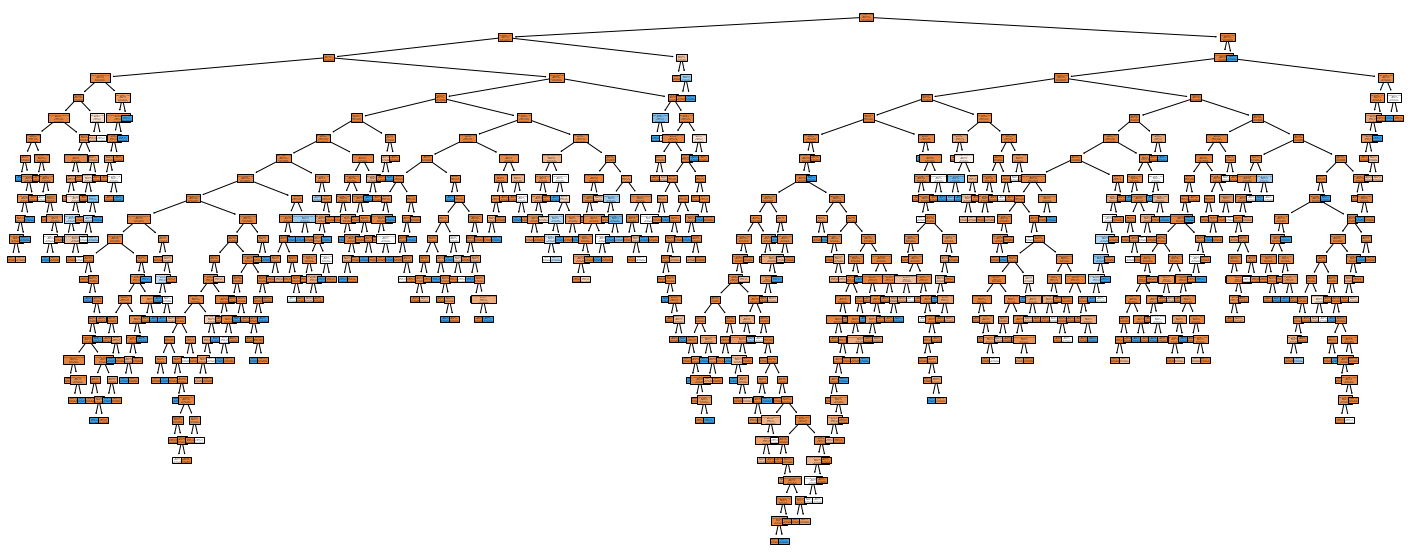

In [11]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X.columns);

## 4) Visualizando a matriz de confusão da base de treinamento

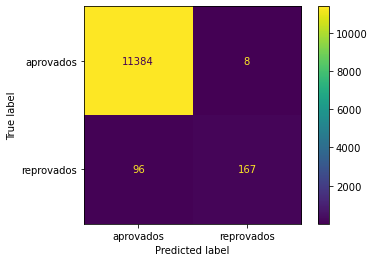

In [12]:
# Matriz Confusão de Treino
plot_confusion_matrix(clf, X_train, y_train, display_labels=['aprovados', 'reprovados']); 

## 5) Calculando a acurácia na base de treinamento

In [13]:
print(X_train.shape)
ÿ_train = clf.predict(X_train)
acuracia_treino = accuracy_score(y_train, ÿ_train)
print(acuracia_treino)

(11655, 28)
0.991076791076791


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

## 1) Classificando a base de teste de acordo com a árvore treinada no item anterior

In [14]:
ÿ_teste = clf.predict(X_test)

## 2) Visualizando a matriz de confusão da base de teste

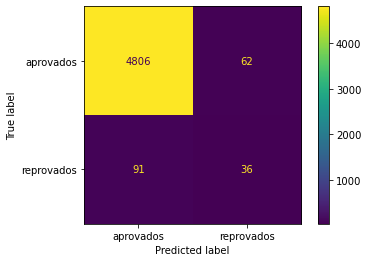

In [15]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['aprovados', 'reprovados']);

In [16]:
X_test.shape

(4995, 28)

## 3) Cálculo da acurácia da base de teste

In [17]:
acuracia_teste = accuracy_score(y_test, ÿ_teste)
print(acuracia_teste)

0.9693693693693693


## 3.1) Comparando a acurácia da base de treinamento X base de teste

In [18]:
print(f"Treino: {acuracia_treino} ")
print(f"Teste.: {acuracia_teste} ")
print(f"Diferença: {round((((acuracia_treino/acuracia_teste)-1)*100),2)}%")

Treino: 0.991076791076791 
Teste.: 0.9693693693693693 
Diferença: 2.24%


## 4) Nova árvore de decisão
<ol>
<li>Nova  árvore com número mínimo de observações por folha = 5 </li>
<li>Profundidade máxima = 10</li>
<li>Random_state = 123</li>
</ol>




In [19]:
clf = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)
ÿ_teste = clf.predict(X_test)
accuracy_score(y_test, ÿ_teste)

0.9727727727727727

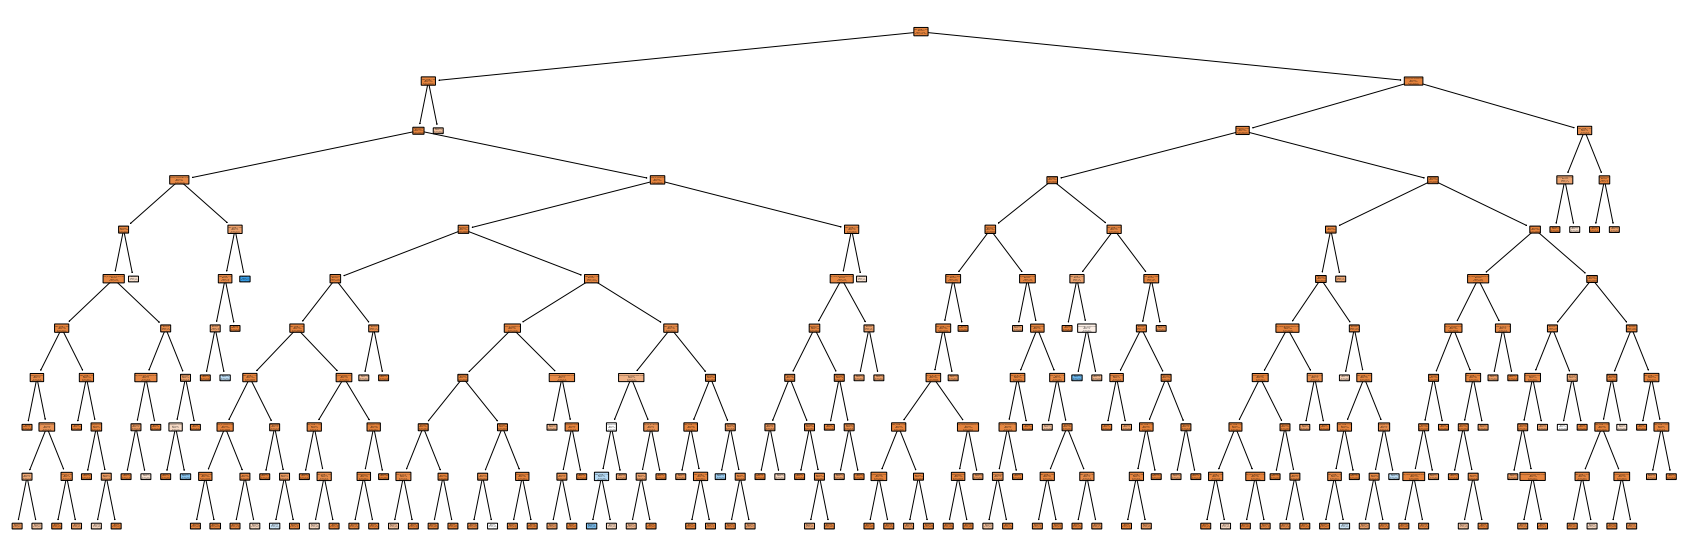

In [20]:
plt.figure(figsize=[30,10])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['aprovados','reprovados'],
         feature_names=X_train.columns);

## 4.1) Nova matriz de confusão

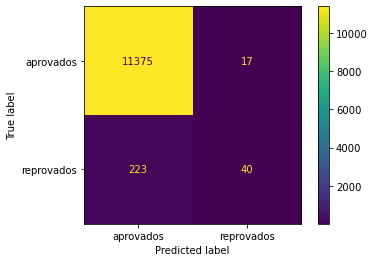

In [21]:
plot_confusion_matrix(clf, X_train, y_train, display_labels=['aprovados', 'reprovados']); 

In [22]:
print(f"11375 proponentes foram classificados como maus")

11375 proponentes foram classificados como maus


# 5) Acurácia com todos os contratos classificados como 'bons'?

In [23]:
y.replace([1], 0,inplace=True)
y.value_counts()

0    16650
Name: mau, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
clf = DecisionTreeClassifier(random_state=123)
clf = clf.fit(X_train,y_train)

In [25]:
clf = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5, random_state=100)
clf = clf.fit(X_train,y_train)
ÿ_teste = clf.predict(X_test)
accuracy_score(y_test, ÿ_teste)

1.0